In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix

In [4]:
cd C:/Users/nobuh/Google Drive/M1/Research/Experiments/2019/Data/cleaned/Complete/ML

C:\Users\nobuh\Google Drive\M1\Research\Experiments\2019\Data\cleaned\Complete\ML


In [5]:
df1 = pd.read_csv('training.csv')
df2 = pd.read_csv('unseen data.csv')

In [23]:
df1

,Class,tag1,tag2,tag3,tag4,tag24,tag25,tag26,tag27,tag1ps,tag2ps,tag3ps,tag4ps
0,1,2577.5,2400.6,2278.90,2554.333333,818.9,572.6,1243.3,499.7,0,0,0,0
1,1,2611.7,2439.7,2278.90,2561.333333,791.1,572.2,1254.3,514.1,0,0,0,0
2,1,2611.7,2439.7,2248.50,2559.400000,796.4,555.0,1269.5,525.4,0,0,0,0
3,1,2609.3,2375.1,2280.20,2559.400000,817.1,570.7,1269.5,525.4,0,0,0,0
4,1,2671.5,2351.3,2280.20,2523.600000,822.8,570.7,1265.3,517.2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,3,2734.6,2712.3,2519.80,2782.200000,0.0,0.0,0.0,0.0,0,0,0,0
3298,3,2685.1,2405.5,3505.05,2775.533333,0.0,0.0,0.0,0.0,0,0,0,0
3299,3,2713.8,2729.1,3505.05,2767.866667,0.0,0.0,0.0,0.0,0,0,0,0
3300,3,2836.9,2852.4,2595.60,2669.933333,0.0,0.0,0.0,0.0,0,0,0,0


In [24]:
df2

,Class,tag1,tag2,tag3,tag4,tag24,tag25,tag26,tag27,tag1ps,tag2ps,tag3ps,tag4ps
0,1,2577.5,2400.6,2278.9,2554.333333,818.9,572.6,1243.3,499.7,0,0,0,0
1,1,2611.7,2439.7,2278.9,2561.333333,791.1,572.2,1254.3,514.1,0,0,0,0
2,1,2611.7,2439.7,2248.5,2559.400000,796.4,555.0,1269.5,525.4,0,0,0,0
3,1,2609.3,2375.1,2280.2,2559.400000,817.1,570.7,1269.5,525.4,0,0,0,0
4,1,2671.5,2351.3,2280.2,2523.600000,822.8,570.7,1265.3,517.2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,3,2612.4,2510.3,2370.9,2466.400000,672.2,516.0,1192.6,539.1,0,0,0,0
1024,3,2637.5,2510.3,2343.6,2441.466667,663.1,516.0,1265.7,539.1,0,0,0,0
1025,3,2637.5,2508.7,2343.6,2441.466667,636.6,511.1,1265.7,535.1,0,0,0,0
1026,3,2652.1,2508.7,2363.2,2435.733333,643.8,546.2,1211.6,544.8,0,0,0,0


In [29]:
df2['Class'].value_counts()

2    366
3    348
1    314
Name: Class, dtype: int64

In [27]:
# 機械学習のモデルを作成するトレーニング用と評価用の2種類に分割する
train_x = df1.drop(['Class'], axis=1) # 説明変数のみにする
train_y = df1['Class'] # 正解クラス
test_x1 = df2.drop(['Class'], axis=1)
test_y1 = df2['Class']
(train_x, test_x ,train_y, test_y) = train_test_split(train_x, train_y, test_size = 0.1, random_state = 123)
#訓練用の説明変数と正解クラス、評価用の説明変数と正解クラスに分割 

In [28]:
# 識別モデルの構築
random_forest = RandomForestClassifier(max_depth=20, n_estimators=80, random_state=123, n_jobs=None)
random_forest.fit(train_x, train_y)

# 予測値算出
y_pred = random_forest.predict(test_x)
y_pred1 = random_forest.predict(test_x1)


#モデルを作成する段階でのモデルの識別精度
trainaccuracy_random_forest = random_forest.score(train_x, train_y)
random_forest = random_forest.score(test_x1, test_y1)
print('TrainAccuracy: {}'.format(trainaccuracy_random_forest))

#作成したモデルに学習に使用していない評価用のデータセットを入力し精度を確認
accuracy_random_forest = accuracy_score(test_y, y_pred)
print('Accuracy: {}'.format(accuracy_random_forest))
print('New Data Accuracy: {}'.format(random_forest))

TrainAccuracy: 1.0
Accuracy: 0.9879154078549849
New Data Accuracy: 0.9105058365758755


Text(91.68, 0.5, 'true value')

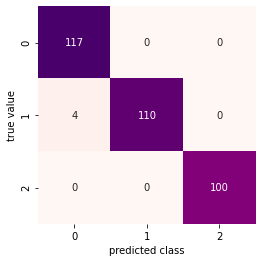

In [18]:
#confusion matrix
mat = confusion_matrix(test_y, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('predicted class')
plt.ylabel('true value')

Text(91.68, 0.5, 'true value')

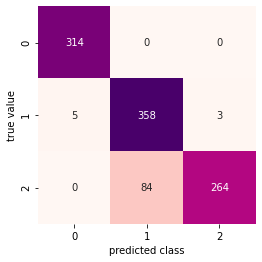

In [19]:
mat = confusion_matrix(test_y1, y_pred1)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('predicted class')
plt.ylabel('true value')